<a href="https://colab.research.google.com/github/EdinK48/ITNPAI_Assignment_Edin_Kciku_3033225/blob/main/ITNPAI1_assignment_Student3033225_TaskB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# trainX, trainY), (testX, testY) = mnist.load_data()
# Import tensorflow and load data into test and training data
import tensorflow as tf 

# Import library for picture display and adjust the size of display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['figure.dpi']  = 100

# import library for random picture selection
import random

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [2]:
# Show dimensions of X_train and y_train
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [3]:
print(y_train[0])

[6]


y_train and y_test contain the classes as numbers --> the number of entries in y_train are the number of pictures in X_train

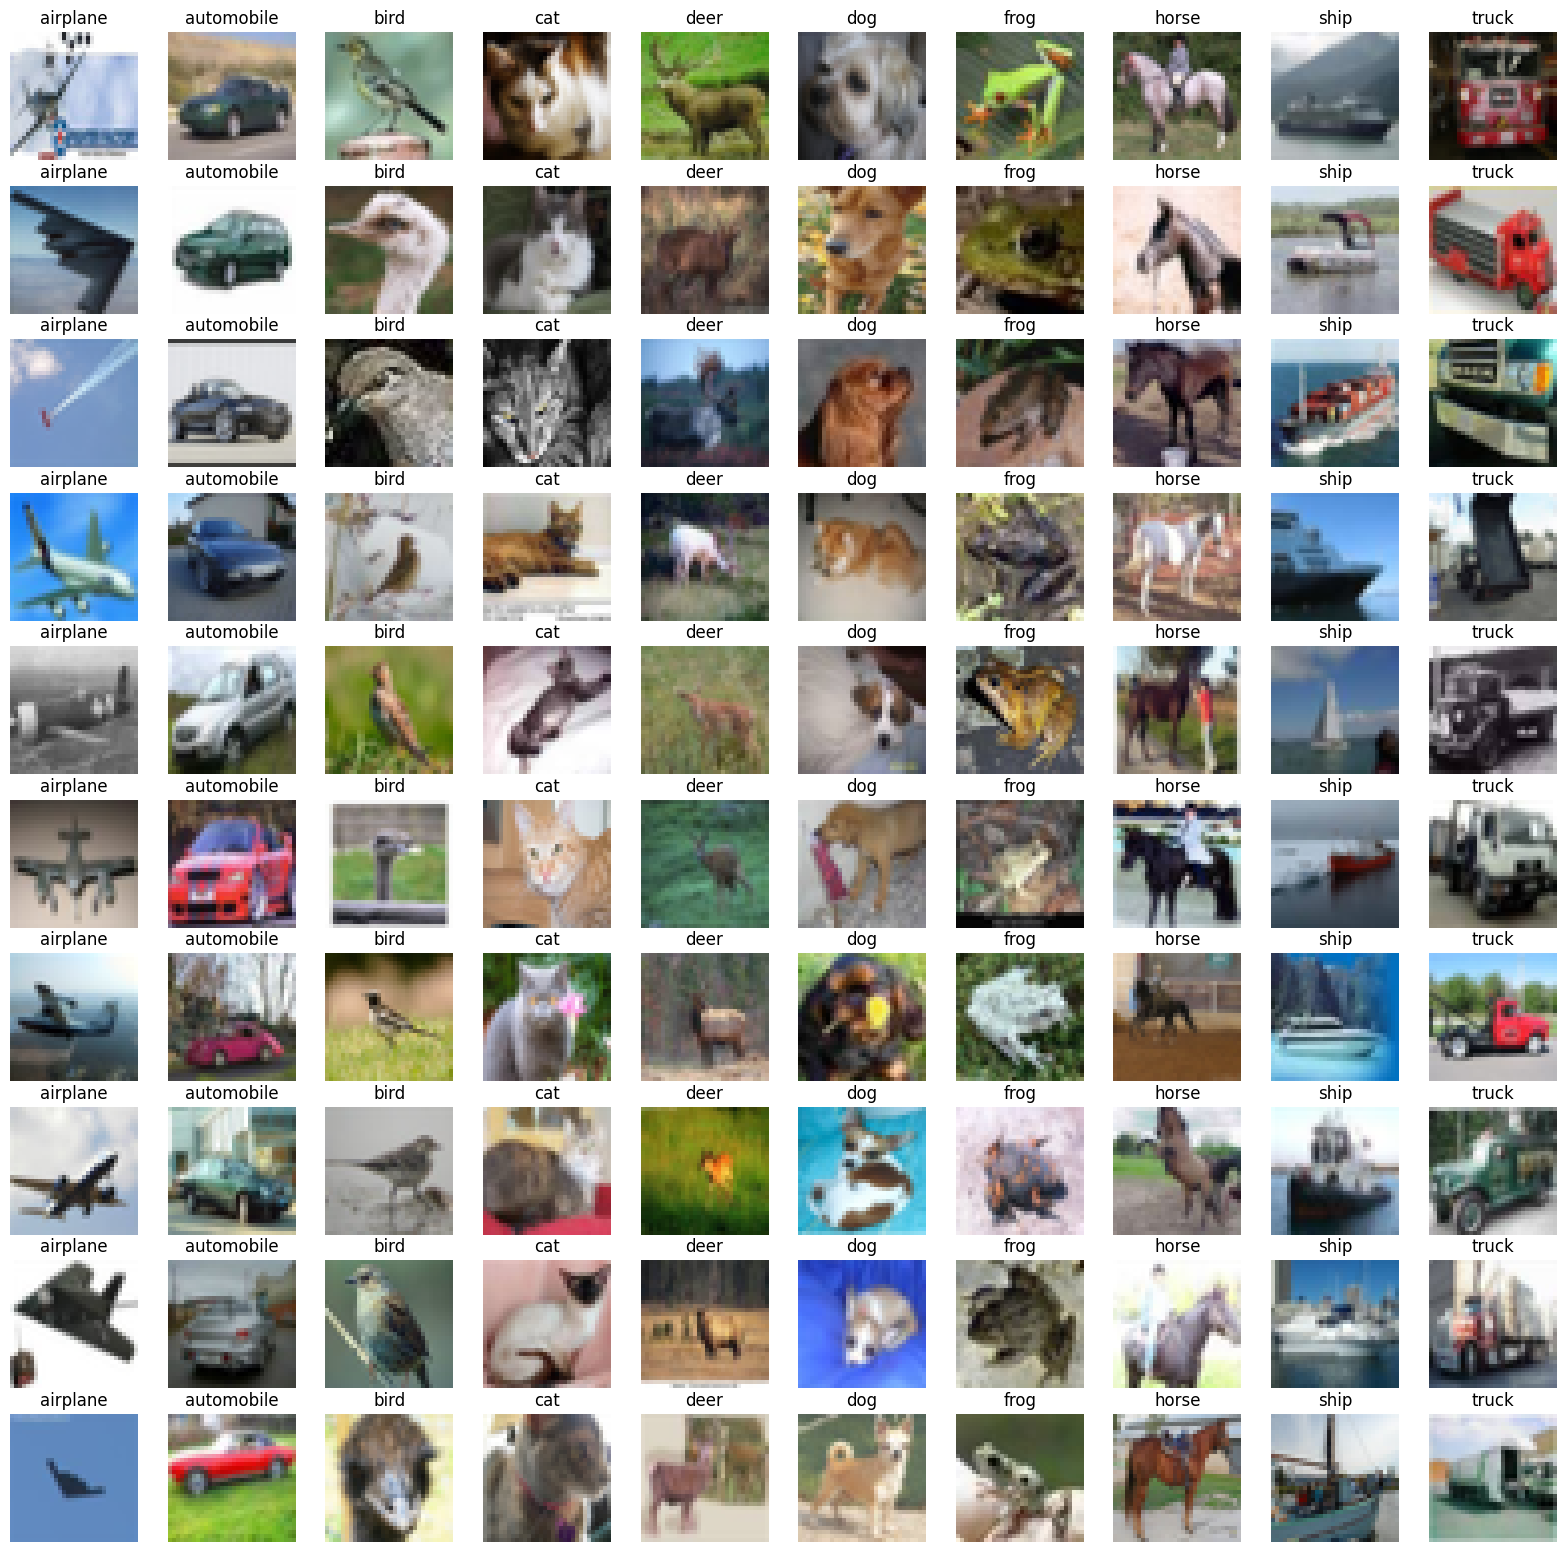

In [58]:
# mapping of class IDs and class names
mapping_class_number = """
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
"""

# Dictionnary that contains the classes as keys.
# Each key contains a list of pictures belonging to the class.
pics_and_classes = {"airplane": [],
                    "automobile": [],
                    "bird": [],
                    "cat": [],
                    "deer": [],
                    "dog": [],
                    "frog": [],
                    "horse": [],
                    "ship": [],
                    "truck": []}

# Loop over range from 0 to number of entries in y_train
# Depending on the entry from y_train that is derived from index i, access 
# the corresponding key from mapping_class_number. Retrieve the picture from
# X_train depending on the index i, and allocate it to the list that belongs to
# the previously retrieved class
for i in range(0, y_train.shape[0]):  # from 0 to number of entries in y_train
  if y_train[i] == 0:  # class airplane
    pics_and_classes["airplane"].append(X_train[i])
  elif y_train[i] == 1:  # class automobile
    pics_and_classes["automobile"].append(X_train[i])
  elif y_train[i] == 2:  # class bird
    pics_and_classes["bird"].append(X_train[i])
  elif y_train[i] == 3:  # class cat
    pics_and_classes["cat"].append(X_train[i])
  elif y_train[i] == 4:  # class deer
    pics_and_classes["deer"].append(X_train[i])
  elif y_train[i] == 5:  # class dog
    pics_and_classes["dog"].append(X_train[i])
  elif y_train[i] == 6:  # class frog
    pics_and_classes["frog"].append(X_train[i])
  elif y_train[i] == 7:  # class horse
    pics_and_classes["horse"].append(X_train[i])
  elif y_train[i] == 8:  # class ship
    pics_and_classes["ship"].append(X_train[i])
  elif y_train[i] == 9:  # class truck
    pics_and_classes["truck"].append(X_train[i])


# Copy of pics_and_classes that can be manipulated freely while keeping
# the original pics_and_classes unchanged
pics_classes_copy = pics_and_classes.copy()

# Initilize the container for the display of the pictures
fig, ax = plt.subplots(10, 10)

images_selected = []
column = 0
# For each key / class inpics__classes_copy, choose randomly 10 pictures
for key in pics_classes_copy:
  for i in range(0, 10):  # 10 random pictures per key / class
    img = random.choice(pics_classes_copy[key])
    ax[i, column].imshow(img)
    ax[i, column].title.set_text(key)
    ax[i, column].axis("off")
  column += 1

